# KNN

- KNN can be used for both classsification and regression task.
- KNN is a non linear model.
- KNN is also called lazy algorithm.
- KNN is uses similarity or distance calculation for classification and regression.(Euclidean/Manhattan)
- KNN is computationally very expensive.
- KNN is very easy to implement and interpret.

In [2]:
#Import libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 300
sns.set_theme(style='darkgrid', palette='rainbow')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
#read diabetes data

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/snehuuu28/Machine_Learning/main/KNN/diabetes.csv")

In [6]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# Describe the data

In [8]:
#describe
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Missing values imputation

In [11]:
df.loc[:,"Glucose":'BMI']

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148,72,35,0,33.6
1,85,66,29,0,26.6
2,183,64,0,0,23.3
3,89,66,23,94,28.1
4,137,40,35,168,43.1
...,...,...,...,...,...
763,101,76,48,180,32.9
764,122,70,27,0,36.8
765,121,72,23,112,26.2
766,126,60,0,0,30.1


In [12]:
df.loc[:,"Glucose":'BMI'] = df.loc[:,"Glucose":'BMI'].replace(0, np.nan)

In [13]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [14]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

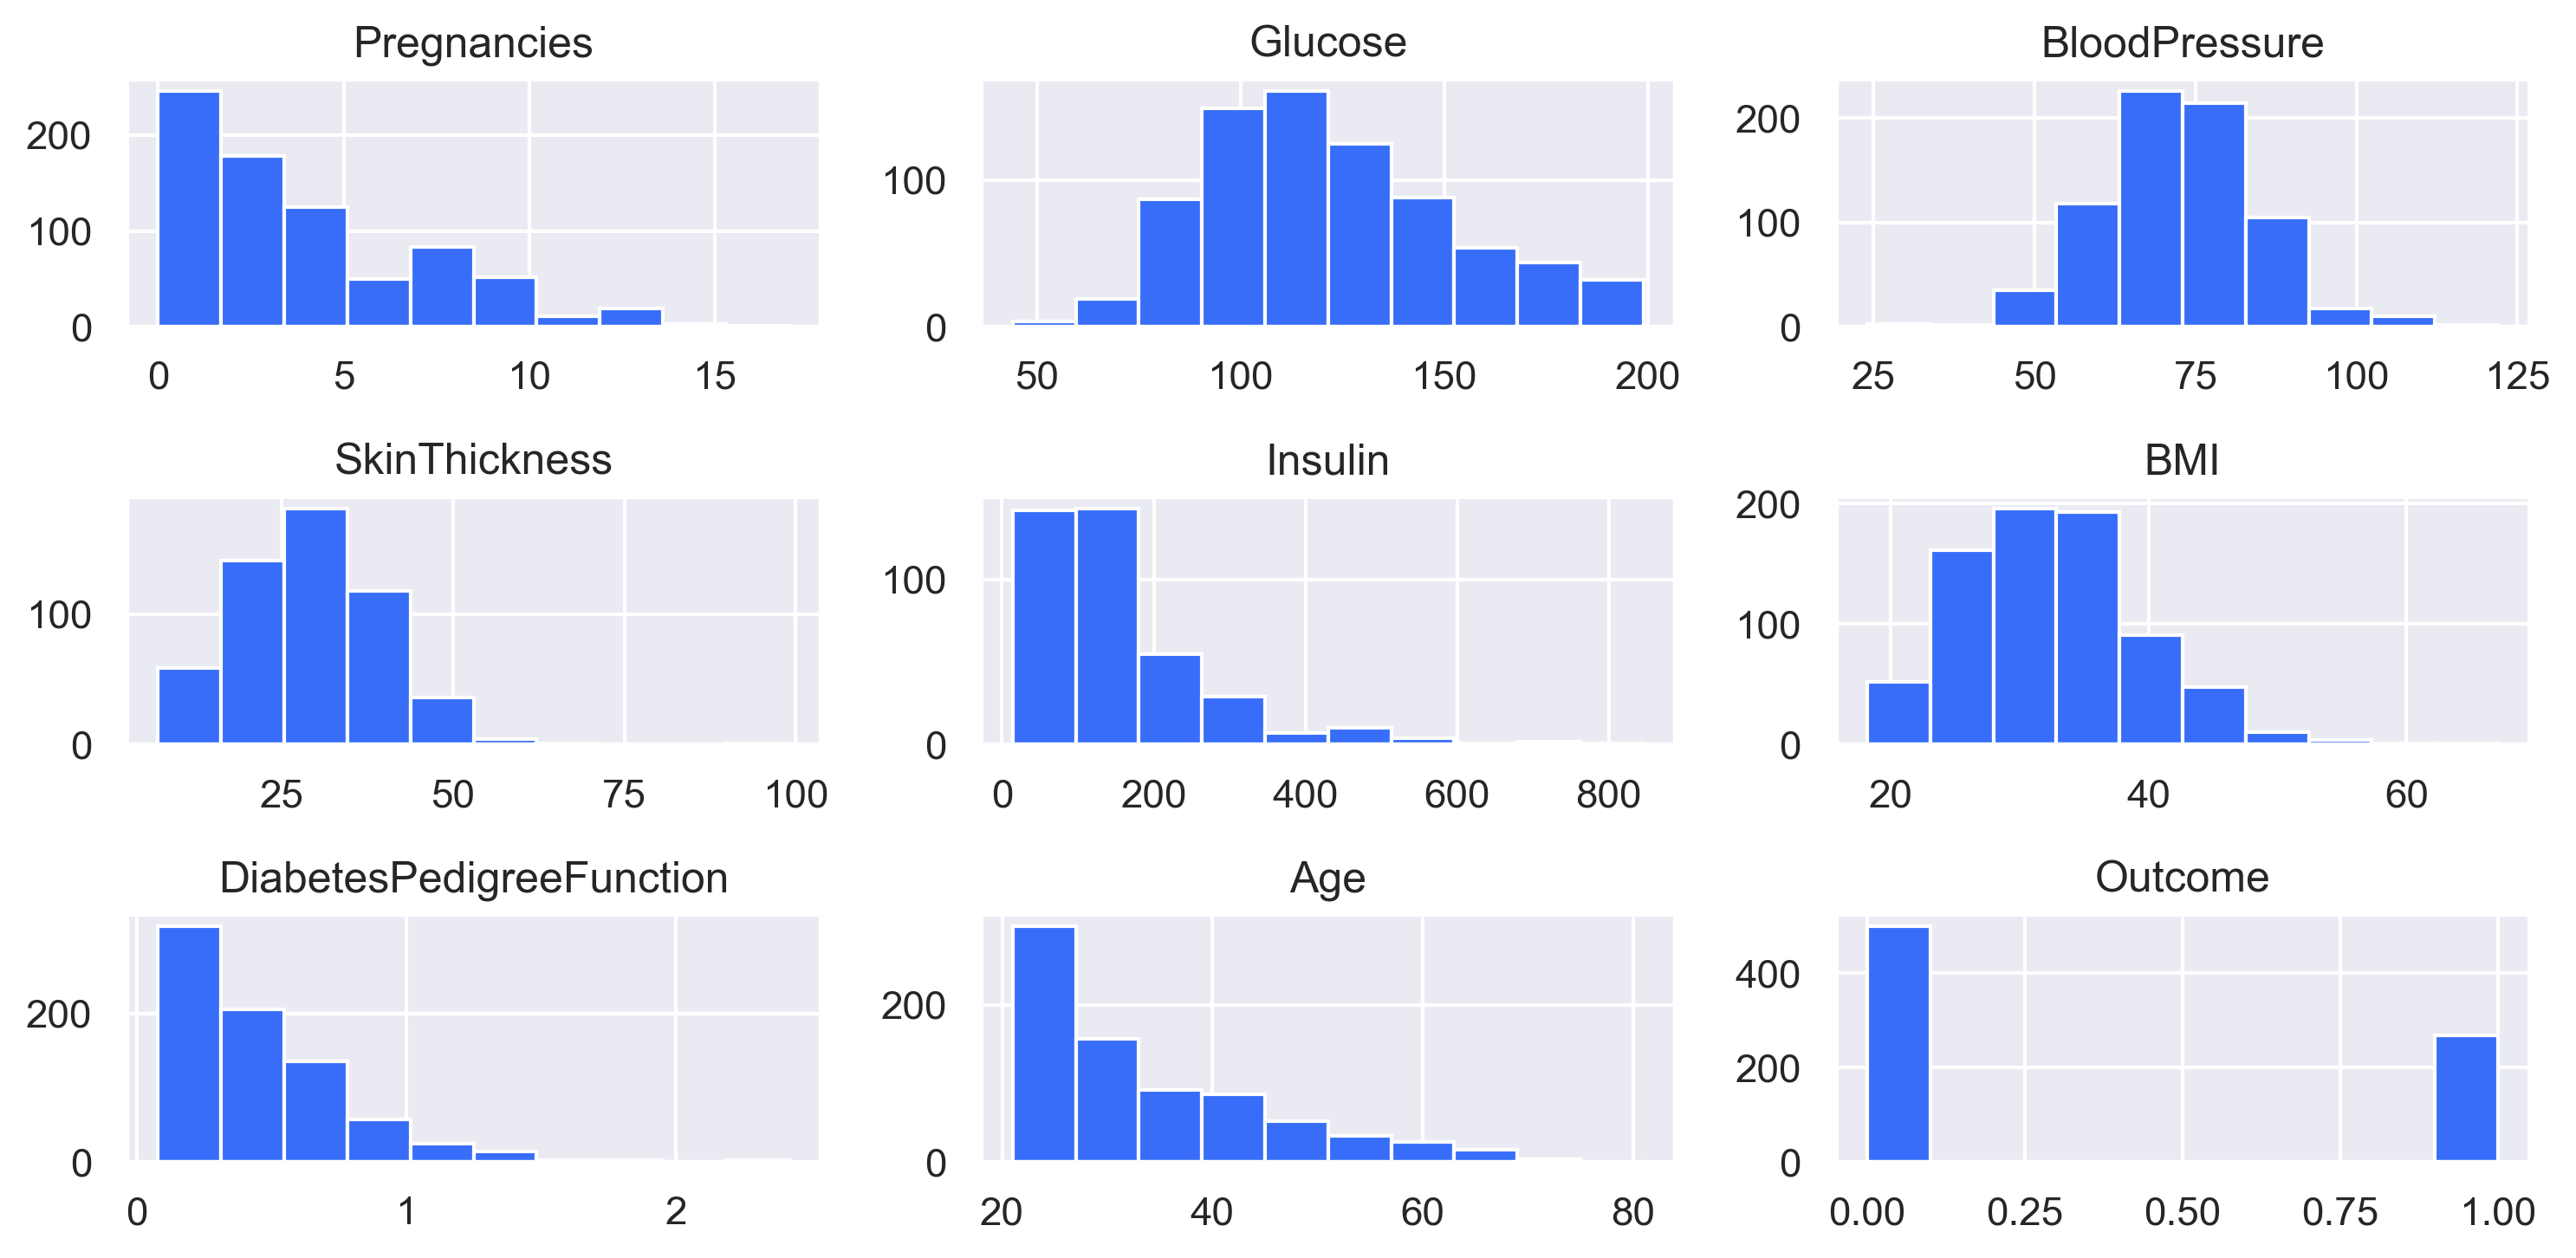

In [15]:
df.hist()
plt.tight_layout()

In [16]:
from sklearn.impute import SimpleImputer

In [17]:
si = SimpleImputer(strategy='median')

df.loc[:,"Glucose":'BMI'] = si.fit_transform(df.loc[:,"Glucose":'BMI'])

In [18]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [19]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [20]:
x = df.iloc[:,:-1]
y = df['Outcome']

# Model building

In [22]:
sc = StandardScaler()

x = sc.fit_transform(x)

In [23]:
x

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29912651,
        -0.47378505, -0.87137393]])

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [25]:
xtest

array([[ 0.93691372,  0.4715475 ,  0.13345296, ..., -0.93952712,
         0.52889435,  1.51108316],
       [-0.84488505,  0.96466906, -1.02464727, ..., -0.92497256,
        -0.88452119, -0.95646168],
       [ 0.63994726, -0.41607132, -1.02464727, ..., -1.08507271,
        -0.80297799, -0.53102292],
       ...,
       [ 1.23388019,  2.18103559,  0.46433873, ...,  2.24792134,
        -1.01136617,  0.83038113],
       [ 0.3429808 ,  0.4715475 ,  0.79522451, ..., -0.02258989,
         0.50775352,  3.04266271],
       [ 0.04601433, -1.04069197, -0.03198993, ..., -0.64843593,
         0.41714996, -0.19067191]])

In [26]:
ytest

285    0
101    0
581    0
352    0
726    0
      ..
563    0
318    0
154    1
684    0
643    0
Name: Outcome, Length: 154, dtype: int64

In [27]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
knn.score(xtrain,ytrain), knn.score(xtest,ytest)

(0.8436482084690554, 0.7792207792207793)

# Hyperparameter Tuning for knn

In [29]:
train_acc = []
test_acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    train_acc.append(knn.score(xtrain,ytrain))
    test_acc.append(knn.score(xtest,ytest))

In [30]:
train_acc

[1.0,
 0.8338762214983714,
 0.8436482084690554,
 0.8127035830618893,
 0.8192182410423453,
 0.7996742671009772,
 0.7947882736156352,
 0.7947882736156352,
 0.7980456026058632,
 0.7850162866449512,
 0.7817589576547231,
 0.7785016286644951,
 0.7833876221498371,
 0.7817589576547231,
 0.7817589576547231,
 0.7671009771986971,
 0.7817589576547231,
 0.7768729641693811,
 0.7703583061889251]

In [31]:
test_acc

[0.6688311688311688,
 0.7337662337662337,
 0.7792207792207793,
 0.7792207792207793,
 0.7987012987012987,
 0.7857142857142857,
 0.7922077922077922,
 0.7727272727272727,
 0.7727272727272727,
 0.7532467532467533,
 0.7922077922077922,
 0.7987012987012987,
 0.8181818181818182,
 0.7987012987012987,
 0.8051948051948052,
 0.7922077922077922,
 0.7857142857142857,
 0.7987012987012987,
 0.7792207792207793]

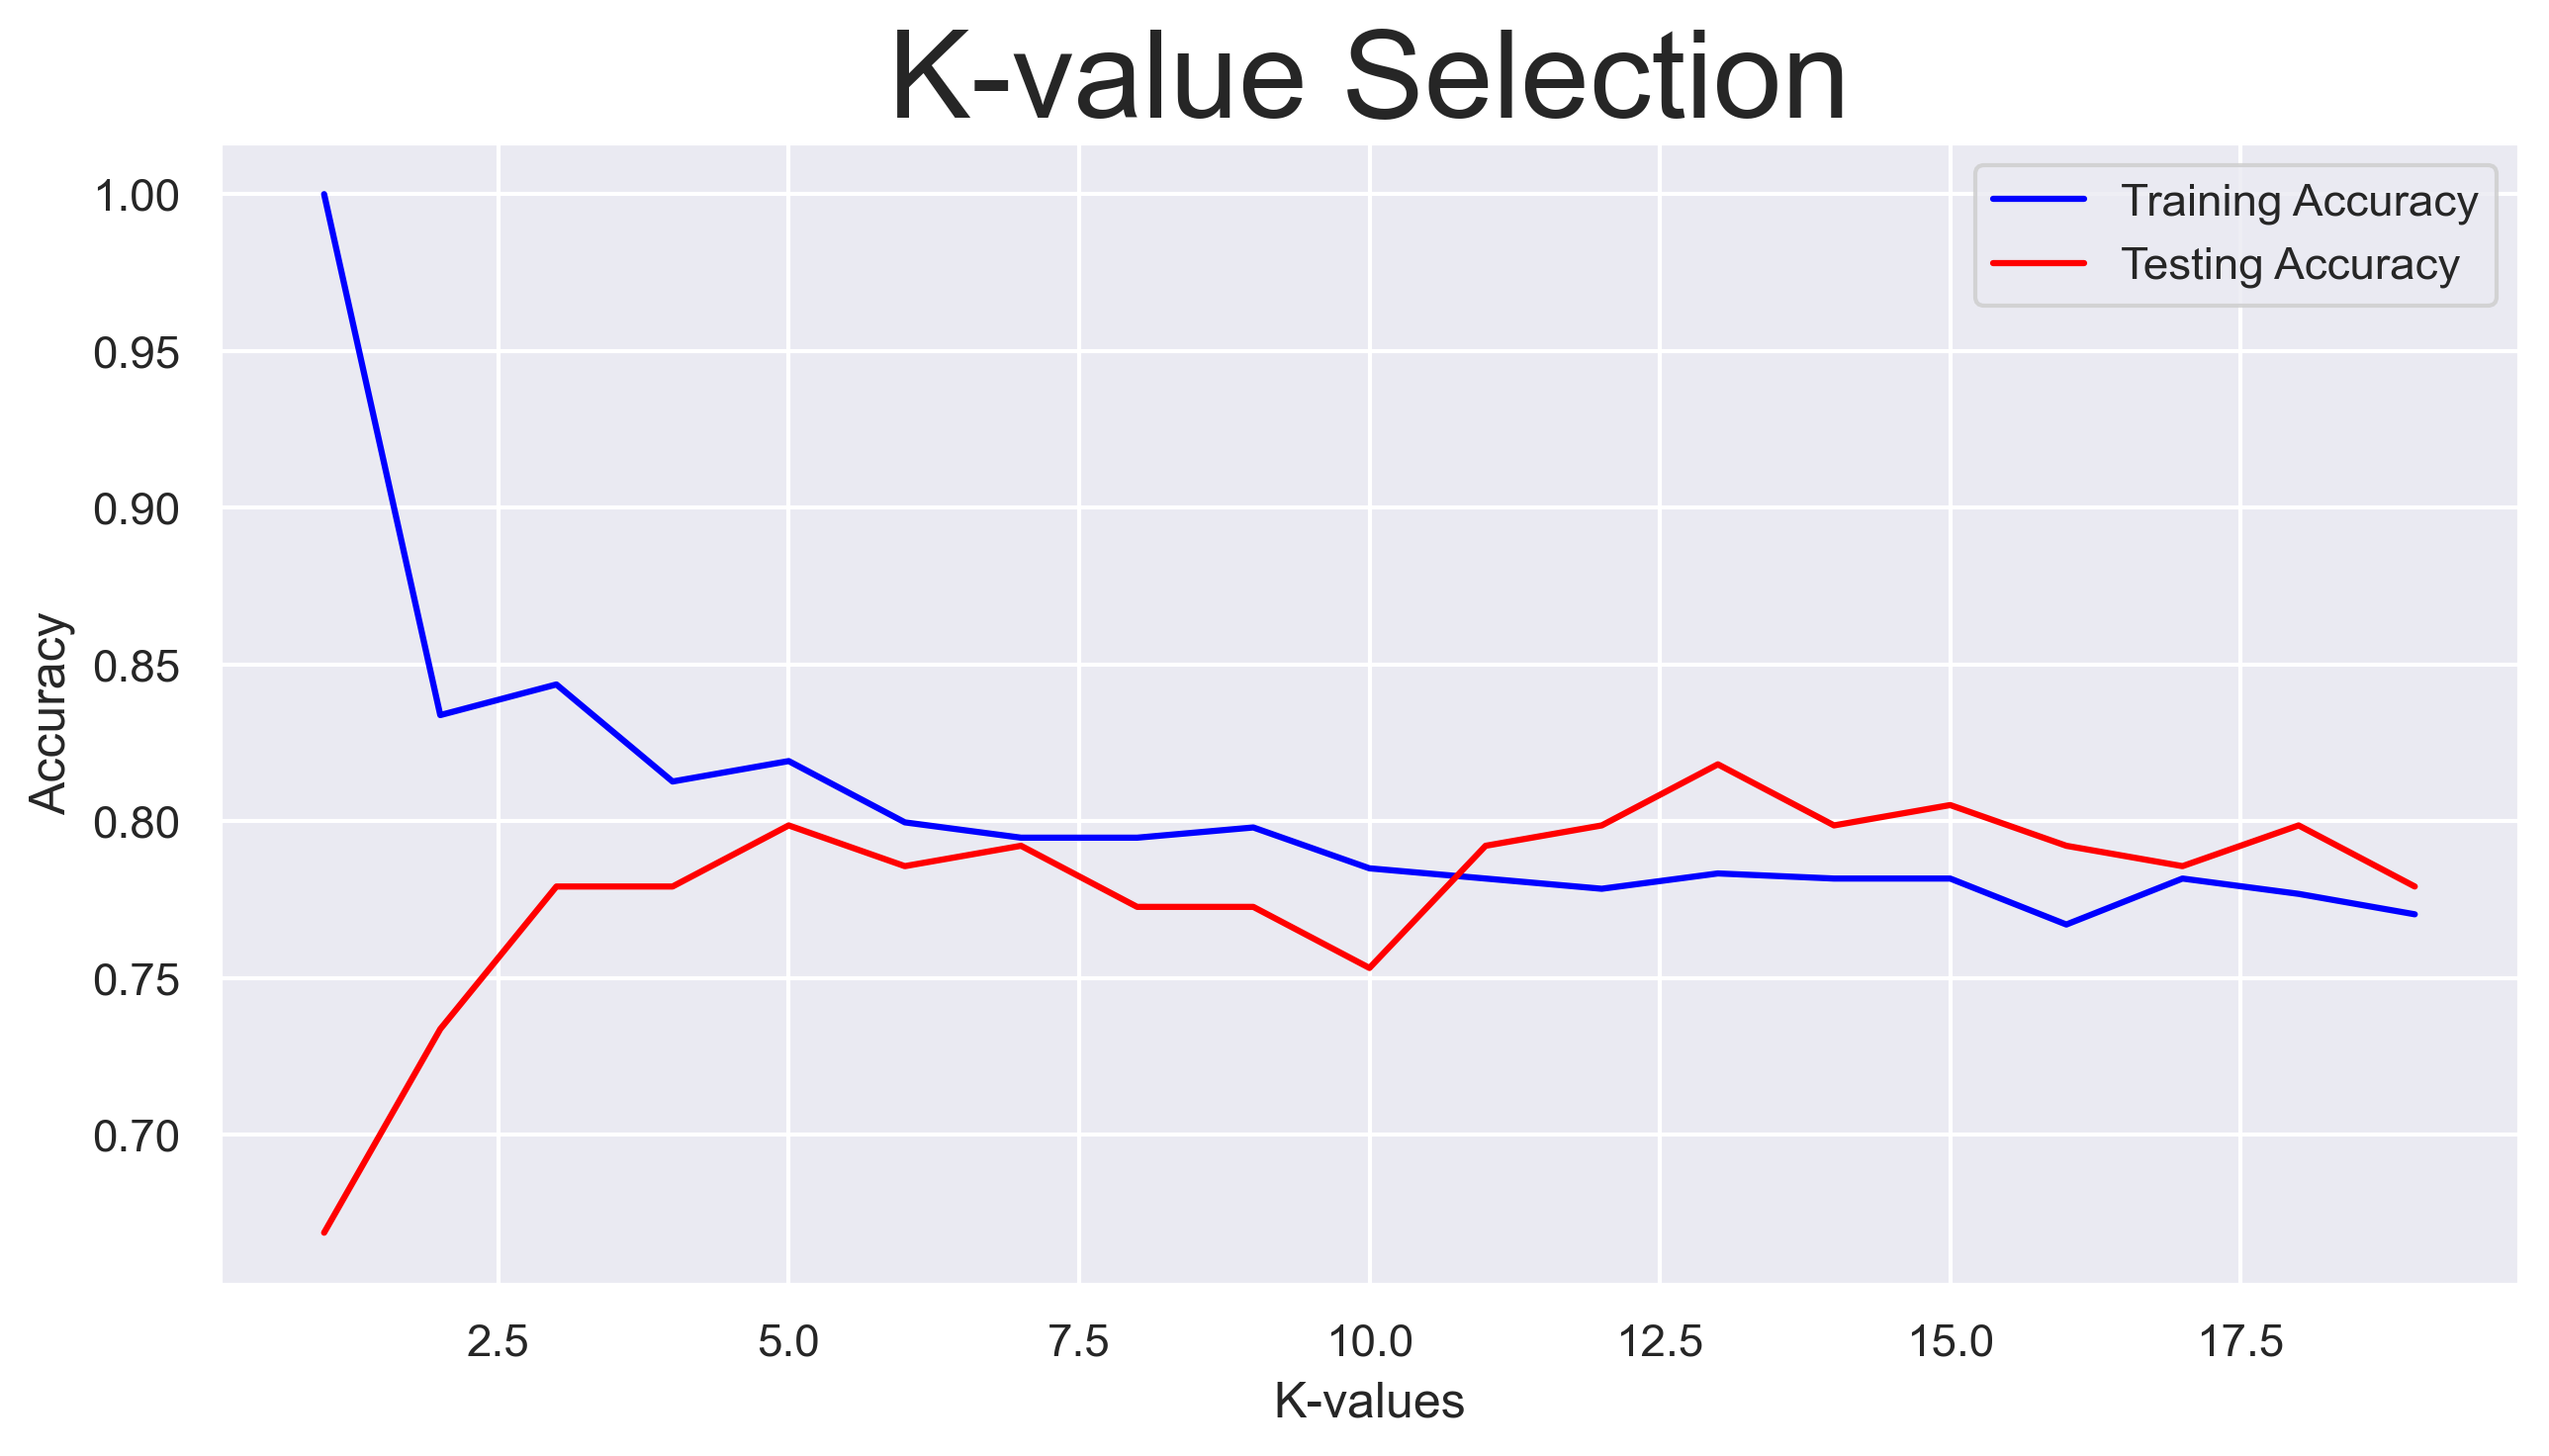

In [32]:
plt.plot(range(1,20), train_acc, color = 'blue', label = 'Training Accuracy')
plt.plot(range(1,20), test_acc, color = 'red', label = 'Testing Accuracy')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.title('K-value Selection', size = 30)
plt.legend()

In [33]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print(f"Train: {np.round(knn.score(xtrain,ytrain),2)} \nTest: {np.round(knn.score(xtest,ytest),2)}")

Train: 0.79 
Test: 0.79


In [34]:
df.shape

(768, 9)

In [35]:
xtrain.shape

(614, 8)

In [36]:
xtest.shape

(154, 8)

In [37]:
out = pd.DataFrame(x, columns= df.columns.drop('Outcome'))

In [38]:
out

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.679069,0.298896,2.150354,0.455573,0.064737,-0.908682,2.532136
764,-0.547919,0.011301,-0.197433,-0.239949,-0.181541,0.632365,-0.398282,-0.531023
765,0.342981,-0.021574,-0.031990,-0.695245,-0.332132,-0.910418,-0.685193,-0.275760
766,-0.844885,0.142800,-1.024647,-0.012301,-0.181541,-0.342790,-0.371101,1.170732


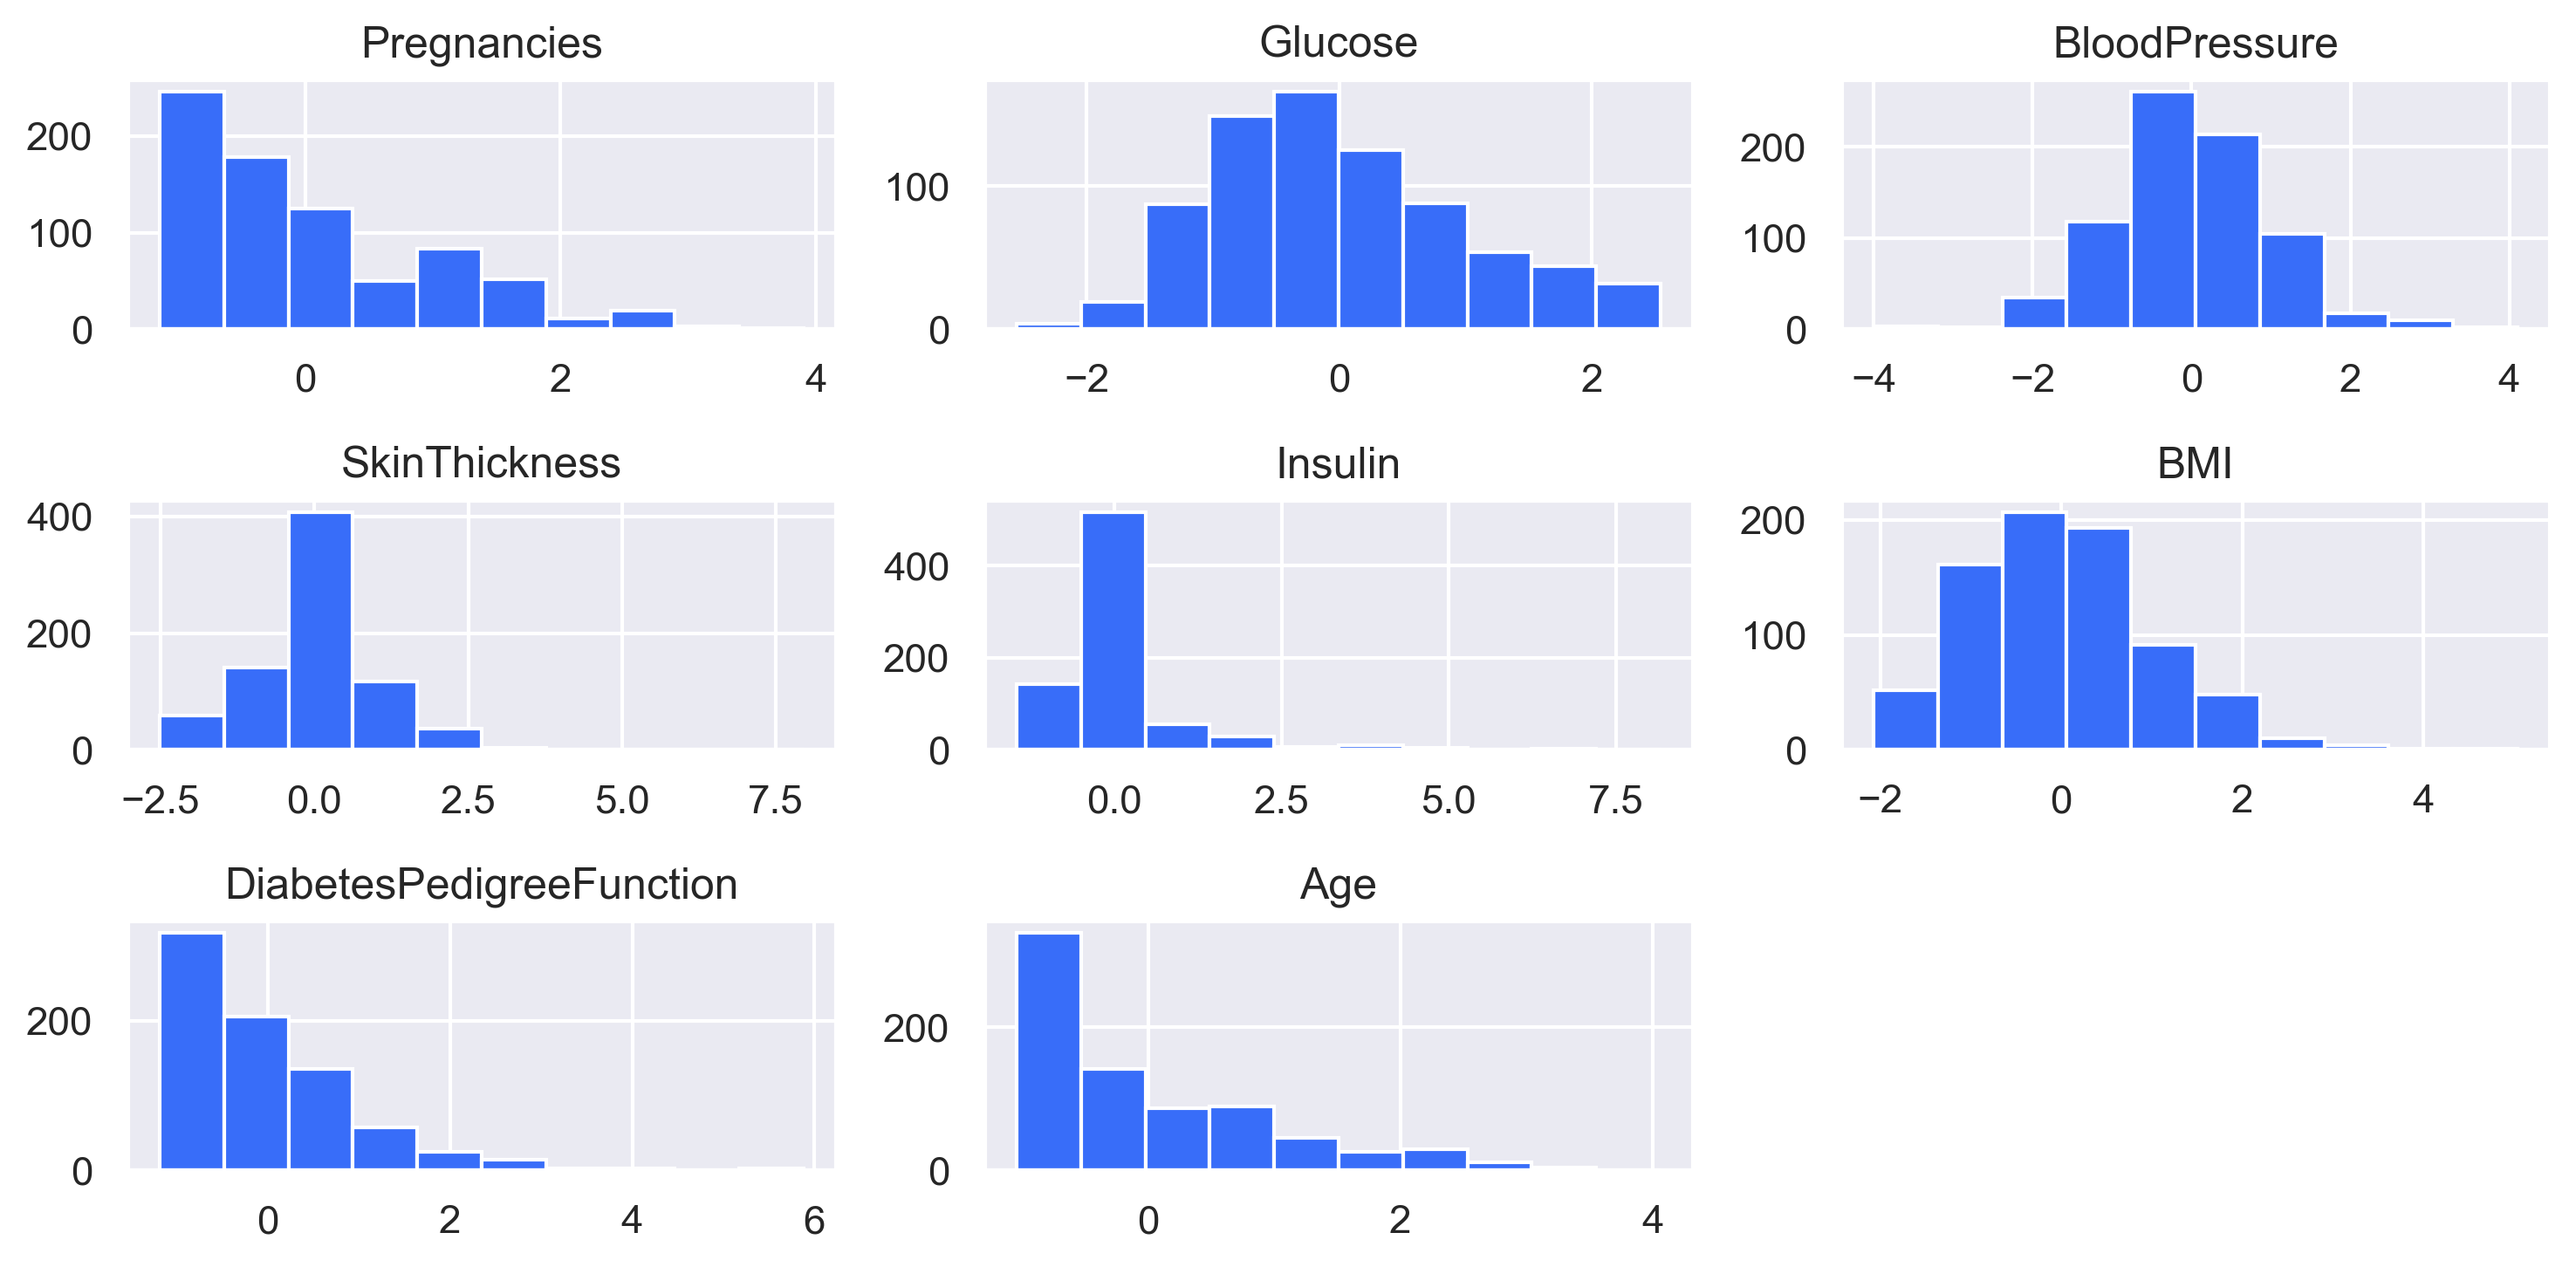

In [39]:
out.hist()
plt.tight_layout()